# Capstone Project - The Battle of the Neighborhoods (Week 5)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem <a name="introduction"></a>

Paris offers many restaurants. Suppose I want to open a Japanese restaurant. I need to know where is the best place to open my restaurant. That is to say analyze the restaurant in each borough and look at the proportion of Japanese restaurant, also take into account the data on the population (age, young people, median income), the price for the rental of the room

# Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
-	Number of Japanese restaurants in Borough
-	Characteristic of people in Borough
-	Price for the rental


So the following will be needed to solve the probleme : 
- https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris  contains the informations of the name and the different neighbordhood in each borough
- https://www.apur.org/dataviz/portraits-metropole-grand-paris-donnees/?fbclid=IwAR13J2vJTTG6ZDpsGJgicSaOkJN1EILnH-GGtyiEDD6yUtypq9cqIC50l7k
Characteristic of people in each borough. We choose only certain informations and put in a csv 
- Foursquare API to find the restaurant in each Borough
- Geopy to find the location of each borough.



# Methodology <a name="methodology"></a>

- We will first extract the data from wikipedia to recover the Boroughs and their neighborhoods.
- We will add the postal code to later search for locations with Geopy.
- Next, we will extract the population data and add it to the dataframe to identify the characteristics of our Boroughs.
- Finally with all these data, we will perform a K-Means in order to cluster our boroughs and be able to analyze them according to their characteristics in the Analysis part

### Import Library

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')
#https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris

Libraries imported.


### Import the data from wikipedia

In [5]:
import requests
html_doc = requests.get('https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris').text

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser') 

In [7]:
#print(soup.prettify()) # this function is used to read the htlm document

In [8]:
#Find the data sortable
data= soup.find('table', {'class' : 'wikitable sortable'})
#data

The important informations about neighbordhood are in < a >

In [9]:
data_a= data.find_all('a')
data.find_all('td')

[<td rowspan="4"><a href="/wiki/1er_arrondissement_de_Paris" title="1er arrondissement de Paris"><abbr class="abbr" title="Premier">1<sup>er</sup></abbr> arrondissement</a><br/>dit « du Louvre »
 </td>,
 <td align="right"><abbr class="abbr" title="Premier">1<sup>er</sup></abbr></td>,
 <td><a href="/wiki/Quartier_Saint-Germain-l%27Auxerrois" title="Quartier Saint-Germain-l'Auxerrois">Saint-Germain-l'Auxerrois</a></td>,
 <td align="right">1 672</td>,
 <td align="right">86,9</td>,
 <td align="right">1 924
 </td>,
 <td rowspan="4"><a class="image" href="/wiki/Fichier:Paris_1er_arrondissement_-_Quartiers.svg"><img alt="Paris 1er arrondissement - Quartiers.svg" data-file-height="646" data-file-width="840" decoding="async" height="92" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Paris_1er_arrondissement_-_Quartiers.svg/120px-Paris_1er_arrondissement_-_Quartiers.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Paris_1er_arrondissement_-_Quartiers.svg/180px-Paris

I take the text, and i append my list with it

In [10]:
list_neighborhood = list()
for element in data_a:
    if element.get('title') is not None :
        element.get('title')
        list_neighborhood.append(element.get('title'))
    
list_neighborhood # Good, but i have to delete certains element in my list (like 'Arrondissement')
list_neighborhood.remove('Arrondissements de Paris')

Create list of 'Arrondissement' and theirs neighbordhoods

In [11]:
list_arrondissement = list()

for i in range(0, len(list_neighborhood), 5):
    list_arrondissement.append(list_neighborhood[i:i+5])

In [12]:
# Check the list
list_arrondissement[0:5] # Great

[['1er arrondissement de Paris',
  "Quartier Saint-Germain-l'Auxerrois",
  'Quartier des Halles',
  'Quartier du Palais-Royal',
  'Quartier de la Place-Vendôme'],
 ['2e arrondissement de Paris',
  'Quartier Gaillon',
  'Quartier Vivienne',
  'Quartier du Mail',
  'Quartier de Bonne-Nouvelle'],
 ['3e arrondissement de Paris',
  'Quartier des Arts-et-Métiers',
  'Quartier des Enfants-Rouges',
  'Quartier des Archives',
  'Quartier Sainte-Avoye'],
 ['4e arrondissement de Paris',
  'Quartier Saint-Merri',
  'Quartier Saint-Gervais',
  "Quartier de l'Arsenal",
  'Quartier Notre-Dame (Paris)'],
 ['5e arrondissement de Paris',
  'Quartier Saint-Victor',
  'Quartier du Jardin-des-Plantes',
  'Quartier du Val-de-Grâce',
  'Quartier de la Sorbonne']]

### Convert list to dataframe

In [13]:
data_paris = pd.DataFrame(list_arrondissement, columns= ['Borough', 'Neighborhood_1','Neighborhood_2','Neighborhood_3','Neighborhood_4']) #convert to dataframe

In [14]:
data_paris.head()

,Borough,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4
0,1er arrondissement de Paris,Quartier Saint-Germain-l'Auxerrois,Quartier des Halles,Quartier du Palais-Royal,Quartier de la Place-Vendôme
1,2e arrondissement de Paris,Quartier Gaillon,Quartier Vivienne,Quartier du Mail,Quartier de Bonne-Nouvelle
2,3e arrondissement de Paris,Quartier des Arts-et-Métiers,Quartier des Enfants-Rouges,Quartier des Archives,Quartier Sainte-Avoye
3,4e arrondissement de Paris,Quartier Saint-Merri,Quartier Saint-Gervais,Quartier de l'Arsenal,Quartier Notre-Dame (Paris)
4,5e arrondissement de Paris,Quartier Saint-Victor,Quartier du Jardin-des-Plantes,Quartier du Val-de-Grâce,Quartier de la Sorbonne


Fusion of Neighborhood on unique column

In [15]:
data_paris['Neighborhood'] = data_paris['Neighborhood_1'] +', ' + data_paris['Neighborhood_2'] + ', ' + data_paris['Neighborhood_3'] + ', ' + data_paris['Neighborhood_4']

In [16]:
#Delete the columns
data_paris.drop(['Neighborhood_1','Neighborhood_2','Neighborhood_3','Neighborhood_4'], axis = 1, inplace = True)

In [17]:
data_paris.head(1) # Great

,Borough,Neighborhood
0,1er arrondissement de Paris,"Quartier Saint-Germain-l'Auxerrois, Quartier d..."


Create Postal code (In paris, the borough have Postal code with a different number : for the first borough (1er arrondissement de Paris), the postal code is 75001, and so on.

In [18]:
postal_liste = list()
for i in range(1,21):
    if i <10:
        postal_liste.append('7500' + str(i))
    else:
         postal_liste.append('750' + str(i))
postal_liste

['75001',
 '75002',
 '75003',
 '75004',
 '75005',
 '75006',
 '75007',
 '75008',
 '75009',
 '75010',
 '75011',
 '75012',
 '75013',
 '75014',
 '75015',
 '75016',
 '75017',
 '75018',
 '75019',
 '75020']

In [19]:
data_paris['Postal Codes'] = postal_liste

In [20]:
#data_paris.head()
data_paris['Borough']

0     1er arrondissement de Paris
1      2e arrondissement de Paris
2      3e arrondissement de Paris
3      4e arrondissement de Paris
4      5e arrondissement de Paris
5      6e arrondissement de Paris
6      7e arrondissement de Paris
7      8e arrondissement de Paris
8      9e arrondissement de Paris
9     10e arrondissement de Paris
10    11e arrondissement de Paris
11    12e arrondissement de Paris
12    13e arrondissement de Paris
13    14e arrondissement de Paris
14    15e arrondissement de Paris
15    16e arrondissement de Paris
16    17e arrondissement de Paris
17    18e arrondissement de Paris
18    19e arrondissement de Paris
19    20e arrondissement de Paris
Name: Borough, dtype: object

Add longitude and latitude for each borough with Geopy

In [21]:
Latitude = list()
Longitude = list()

for postal in data_paris['Postal Codes'] :
    address = postal
    geolocator=Nominatim(timeout = 400)
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)

/Users/ilyes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [22]:
#Transform list to serie
Latitude= pd.Series(Latitude)
Longitude= pd.Series(Longitude)

#Concat serie and data_paris
paris_data = pd.concat([data_paris, Latitude, Longitude],axis =1)
paris_data.columns =['Borough','Neighborhood','Postal Codes','Latitude','Longitude']

In [23]:
paris_data.head() # great

,Borough,Neighborhood,Postal Codes,Latitude,Longitude
0,1er arrondissement de Paris,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",75001,48.857366,2.336815
1,2e arrondissement de Paris,"Quartier Gaillon, Quartier Vivienne, Quartier ...",75002,48.867460,2.344156
2,3e arrondissement de Paris,"Quartier des Arts-et-Métiers, Quartier des Enf...",75003,48.861751,2.361134
3,4e arrondissement de Paris,"Quartier Saint-Merri, Quartier Saint-Gervais, ...",75004,48.856079,2.345537
4,5e arrondissement de Paris,"Quartier Saint-Victor, Quartier du Jardin-des-...",75005,48.852752,2.346343


In [24]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[48.8566969, 2.3514616], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Borough'], paris_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

### Import Statistic of Paris 

In [25]:
stats_paris = pd.read_csv('/Users/ilyes/Downloads/data_paris.csv', sep=';', decimal=',')
stats_paris.head()

,Postal Code,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price
0,75001,16545.0,15.3,18.7,8.5,31843.0,328.0,11290.0
1,75002,20796.0,15.7,10.1,8.9,30025.0,603.0,11270.0
2,75003,35049.0,15.6,13.2,9.6,30988.0,267.0,11240.0
3,75004,27146.0,15.7,17.1,10.1,30515.0,260.0,12300.0
4,75005,59333.0,17.8,18.8,16.5,32950.0,211.0,11330.0


Merge with paris_data

In [26]:
paris_grouped = pd.concat([paris_data, stats_paris], axis = 1)
paris_grouped.head()

,Borough,Neighborhood,Postal Codes,Latitude,Longitude,Postal Code,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price
0,1er arrondissement de Paris,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",75001,48.857366,2.336815,75001,16545.0,15.3,18.7,8.5,31843.0,328.0,11290.0
1,2e arrondissement de Paris,"Quartier Gaillon, Quartier Vivienne, Quartier ...",75002,48.867460,2.344156,75002,20796.0,15.7,10.1,8.9,30025.0,603.0,11270.0
2,3e arrondissement de Paris,"Quartier des Arts-et-Métiers, Quartier des Enf...",75003,48.861751,2.361134,75003,35049.0,15.6,13.2,9.6,30988.0,267.0,11240.0
3,4e arrondissement de Paris,"Quartier Saint-Merri, Quartier Saint-Gervais, ...",75004,48.856079,2.345537,75004,27146.0,15.7,17.1,10.1,30515.0,260.0,12300.0
4,5e arrondissement de Paris,"Quartier Saint-Victor, Quartier du Jardin-des-...",75005,48.852752,2.346343,75005,59333.0,17.8,18.8,16.5,32950.0,211.0,11330.0


In [27]:
paris_grouped.drop('Postal Code' , inplace = True, axis = 1)
paris_data = paris_grouped

In [28]:
paris_data.head()

,Borough,Neighborhood,Postal Codes,Latitude,Longitude,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price
0,1er arrondissement de Paris,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",75001,48.857366,2.336815,16545.0,15.3,18.7,8.5,31843.0,328.0,11290.0
1,2e arrondissement de Paris,"Quartier Gaillon, Quartier Vivienne, Quartier ...",75002,48.867460,2.344156,20796.0,15.7,10.1,8.9,30025.0,603.0,11270.0
2,3e arrondissement de Paris,"Quartier des Arts-et-Métiers, Quartier des Enf...",75003,48.861751,2.361134,35049.0,15.6,13.2,9.6,30988.0,267.0,11240.0
3,4e arrondissement de Paris,"Quartier Saint-Merri, Quartier Saint-Gervais, ...",75004,48.856079,2.345537,27146.0,15.7,17.1,10.1,30515.0,260.0,12300.0
4,5e arrondissement de Paris,"Quartier Saint-Victor, Quartier du Jardin-des-...",75005,48.852752,2.346343,59333.0,17.8,18.8,16.5,32950.0,211.0,11330.0


### Foursquare : Find the restaurant in each borough

In [29]:
CLIENT_ID = 'EMZD1KXEIYSLOF0XH3WL1E45QG25HI1AJAPG3IOP1VUWCFYP' # your Foursquare ID
CLIENT_SECRET = 'G43FYU05TEEZ1EYBH21AHMM2CMMBYLUVBDZ0YWUIBAG34B24' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EMZD1KXEIYSLOF0XH3WL1E45QG25HI1AJAPG3IOP1VUWCFYP
CLIENT_SECRET:G43FYU05TEEZ1EYBH21AHMM2CMMBYLUVBDZ0YWUIBAG34B24


In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT = 100    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
paris_venues = getNearbyVenues(names=paris_data['Neighborhood'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )

Quartier Saint-Germain-l'Auxerrois, Quartier des Halles, Quartier du Palais-Royal, Quartier de la Place-Vendôme
Quartier Gaillon, Quartier Vivienne, Quartier du Mail, Quartier de Bonne-Nouvelle
Quartier des Arts-et-Métiers, Quartier des Enfants-Rouges, Quartier des Archives, Quartier Sainte-Avoye
Quartier Saint-Merri, Quartier Saint-Gervais, Quartier de l'Arsenal, Quartier Notre-Dame (Paris)
Quartier Saint-Victor, Quartier du Jardin-des-Plantes, Quartier du Val-de-Grâce, Quartier de la Sorbonne
Quartier de la Monnaie, Quartier de l'Odéon, Quartier Notre-Dame-des-Champs, Quartier Saint-Germain-des-Prés
Quartier Saint-Thomas-d'Aquin, Quartier des Invalides, Quartier de l'École-Militaire, Quartier du Gros-Caillou
Quartier des Champs-Élysées, Quartier du Faubourg-du-Roule, Quartier de la Madeleine, Quartier de l'Europe
Quartier Saint-Georges (Paris), Quartier de la Chaussée-d'Antin, Quartier du Faubourg-Montmartre, Quartier de Rochechouart
Quartier Saint-Vincent-de-Paul, Quartier de la Por

In [32]:
paris_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Buly 1803,48.857146,2.335039,Cosmetics Shop
1,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Pont des Arts,48.858565,2.337635,Bridge
2,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,L'Hotel,48.856377,2.335193,Hotel
3,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Guy Savoy,48.857085,2.338807,French Restaurant
4,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Monnaie de Paris,48.856833,2.339058,Museum


In [33]:
paris_venues['Venue Category'].value_counts()

French Restaurant                163
Hotel                             90
Bakery                            40
Italian Restaurant                39
Plaza                             34
Coffee Shop                       26
Bar                               26
Bistro                            26
Café                              25
Japanese Restaurant               25
Cocktail Bar                      23
Wine Bar                          21
Vietnamese Restaurant             19
Restaurant                        19
Sandwich Place                    17
Bookstore                         16
Asian Restaurant                  15
Garden                            15
Pizza Place                       14
Tea Room                          14
Supermarket                       14
Boutique                          14
Clothing Store                    13
Dessert Shop                      13
Park                              12
Theater                           12
Wine Shop                         11
G

#### We filter by restaurant to keep only restaurant for comparaison

In [34]:
mask = paris_venues['Venue Category'].str.find('Restaurant')!= -1
paris_venues[mask].head(5) 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Guy Savoy,48.857085,2.338807,French Restaurant
7,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Le Restaurant de L'Hôtel,48.856192,2.335133,French Restaurant
11,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Boutary,48.854877,2.337930,French Restaurant
17,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Semilla,48.854067,2.336857,Modern European Restaurant
19,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",48.857366,2.336815,Freddy's,48.854095,2.336873,Tapas Restaurant


In [35]:
paris_venues = paris_venues[mask]

In [36]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Quartier Gaillon, Quartier Vivienne, Quartier du Mail, Quartier de Bonne-Nouvelle",28,28,28,28,28,28
"Quartier Saint-Georges (Paris), Quartier de la Chaussée-d'Antin, Quartier du Faubourg-Montmartre, Quartier de Rochechouart",35,35,35,35,35,35
"Quartier Saint-Germain-l'Auxerrois, Quartier des Halles, Quartier du Palais-Royal, Quartier de la Place-Vendôme",22,22,22,22,22,22
"Quartier Saint-Lambert, Quartier Necker, Quartier de Grenelle, Quartier de Javel",23,23,23,23,23,23
"Quartier Saint-Merri, Quartier Saint-Gervais, Quartier de l'Arsenal, Quartier Notre-Dame (Paris)",26,26,26,26,26,26
"Quartier Saint-Thomas-d'Aquin, Quartier des Invalides, Quartier de l'École-Militaire, Quartier du Gros-Caillou",20,20,20,20,20,20
"Quartier Saint-Victor, Quartier du Jardin-des-Plantes, Quartier du Val-de-Grâce, Quartier de la Sorbonne",18,18,18,18,18,18
"Quartier Saint-Vincent-de-Paul, Quartier de la Porte-Saint-Denis, Quartier de la Porte-Saint-Martin, Quartier de l'Hôpital-Saint-Louis",30,30,30,30,30,30
"Quartier d'Auteuil, Quartier de la Muette, Quartier de la Porte-Dauphine, Quartier de Chaillot",30,30,30,30,30,30


In [37]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 52 uniques categories.


In [38]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,African Restaurant,Alsatian Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Auvergne Restaurant,Basque Restaurant,Brazilian Restaurant,Breton Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Ch'ti Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
3,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
paris_onehot.shape

(405, 53)

In [40]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head()

,Neighborhood,African Restaurant,Alsatian Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Auvergne Restaurant,Basque Restaurant,Brazilian Restaurant,Breton Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Ch'ti Restaurant,Chinese Restaurant,Dim Sum Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,"Quartier Gaillon, Quartier Vivienne, Quartier ...",0.0,0.000000,0.0,0.000000,0.035714,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.035714,0.000000,0.0,0.0,0.000000,0.0,0.357143,0.0,0.035714,0.0,0.000000,0.035714,0.035714,0.107143,0.035714,0.0,0.000000,0.035714,0.0,0.035714,0.0,0.000000,0.000000,0.0,0.000000,0.035714,0.000000,0.035714,0.035714,0.035714,0.000000,0.000000,0.000000,0.0,0.0,0.035714,0.071429,0.000000,0.000000,0.000000,0.000000
1,"Quartier Saint-Georges (Paris), Quartier de la...",0.0,0.000000,0.0,0.000000,0.028571,0.000000,0.0,0.028571,0.000000,0.0,0.0,0.000000,0.028571,0.0,0.0,0.028571,0.0,0.457143,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.085714,0.085714,0.0,0.028571,0.000000,0.0,0.000000,0.0,0.028571,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.028571,0.0,0.0,0.000000,0.000000,0.028571,0.057143,0.028571,0.028571
2,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",0.0,0.000000,0.0,0.045455,0.045455,0.000000,0.0,0.000000,0.045455,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.454545,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.045455,0.090909,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.045455,0.000000,0.0,0.000000,0.000000,0.000000,0.045455,0.090909,0.000000,0.000000,0.000000,0.045455,0.0,0.0,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Quartier Saint-Lambert, Quartier Necker, Quart...",0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.217391,0.0,0.000000,0.0,0.086957,0.000000,0.000000,0.173913,0.043478,0.0,0.000000,0.130435,0.0,0.000000,0.0,0.000000,0.043478,0.0,0.043478,0.000000,0.000000,0.000000,0.086957,0.000000,0.043478,0.043478,0.043478,0.0,0.0,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000
4,"Quartier Saint-Merri, Quartier Saint-Gervais, ...",0.0,0.038462,0.0,0.038462,0.000000,0.038462,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.076923,0.0,0.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.076923,0.0,0.000000,0.038462,0.0,0.000000,0.0,0.000000,0.038462,0.0,0.000000,0.000000,0.038462,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Quartier Gaillon, Quartier Vivienne, Quartier du Mail, Quartier de Bonne-Nouvelle----
                   venue  freq
0      French Restaurant  0.36
1     Italian Restaurant  0.11
2        Thai Restaurant  0.07
3             Restaurant  0.04
4    Romanian Restaurant  0.04
5    Lebanese Restaurant  0.04
6    Japanese Restaurant  0.04
7     Israeli Restaurant  0.04
8  Indonesian Restaurant  0.04
9    Peruvian Restaurant  0.04


----Quartier Saint-Georges (Paris), Quartier de la Chaussée-d'Antin, Quartier du Faubourg-Montmartre, Quartier de Rochechouart----
                           venue  freq
0              French Restaurant  0.46
1            Japanese Restaurant  0.09
2             Italian Restaurant  0.09
3  Vegetarian / Vegan Restaurant  0.06
4          Vietnamese Restaurant  0.03
5             Seafood Restaurant  0.03
6     Modern European Restaurant  0.03
7      Latin American Restaurant  0.03
8        Scandinavian Restaurant  0.03
9             Chinese Restaurant  0.03


----Q

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Quartier Gaillon, Quartier Vivienne, Quartier ...",French Restaurant,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Restaurant,Indonesian Restaurant,Israeli Restaurant,Lebanese Restaurant,Mexican Restaurant,Ch'ti Restaurant
1,"Quartier Saint-Georges (Paris), Quartier de la...",French Restaurant,Japanese Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Venezuelan Restaurant
2,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",French Restaurant,Japanese Restaurant,Restaurant,Seafood Restaurant,Ramen Restaurant,Breton Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Argentinian Restaurant
3,"Quartier Saint-Lambert, Quartier Necker, Quart...",French Restaurant,Italian Restaurant,Lebanese Restaurant,Indian Restaurant,Restaurant,Scandinavian Restaurant,Moroccan Restaurant,Persian Restaurant,Russian Restaurant,Japanese Restaurant
4,"Quartier Saint-Merri, Quartier Saint-Gervais, ...",French Restaurant,Japanese Restaurant,Falafel Restaurant,Restaurant,Auvergne Restaurant,Lebanese Restaurant,Moroccan Restaurant,Portuguese Restaurant,Tapas Restaurant,Alsatian Restaurant
5,"Quartier Saint-Thomas-d'Aquin, Quartier des In...",French Restaurant,Italian Restaurant,Basque Restaurant,Korean Restaurant,Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Auvergne Restaurant,Indonesian Restaurant
6,"Quartier Saint-Victor, Quartier du Jardin-des-...",French Restaurant,Japanese Restaurant,Lebanese Restaurant,Restaurant,Tapas Restaurant,Mexican Restaurant,Falafel Restaurant,Chinese Restaurant,Indian Restaurant,Hawaiian Restaurant
7,"Quartier Saint-Vincent-de-Paul, Quartier de la...",French Restaurant,Japanese Restaurant,Restaurant,Indian Restaurant,Breton Restaurant,Fast Food Restaurant,Gluten-free Restaurant,Hawaiian Restaurant,Israeli Restaurant,Korean Restaurant
8,"Quartier d'Auteuil, Quartier de la Muette, Qua...",French Restaurant,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Restaurant,African Restaurant,Sushi Restaurant,Thai Restaurant
9,"Quartier de Belleville, Quartier Saint-Fargeau...",Mexican Restaurant,Vietnamese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hawaiian Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Fast Food Restaurant


## Clustering

In [43]:
# set number of clusters
kclusters = 5

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 4, 3, 1, 3, 3, 4, 2], dtype=int32)

Find the best k-clusters


In [44]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(paris_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

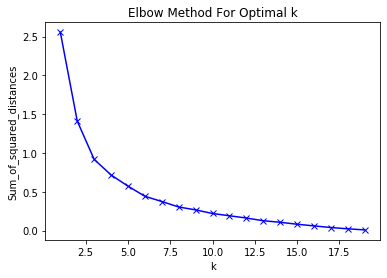

In [63]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The best k-cluster is for k=5

In [46]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Quartier Gaillon, Quartier Vivienne, Quartier ...",French Restaurant,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Restaurant,Indonesian Restaurant,Israeli Restaurant,Lebanese Restaurant,Mexican Restaurant,Ch'ti Restaurant
1,"Quartier Saint-Georges (Paris), Quartier de la...",French Restaurant,Japanese Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Venezuelan Restaurant
2,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",French Restaurant,Japanese Restaurant,Restaurant,Seafood Restaurant,Ramen Restaurant,Breton Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Argentinian Restaurant
3,"Quartier Saint-Lambert, Quartier Necker, Quart...",French Restaurant,Italian Restaurant,Lebanese Restaurant,Indian Restaurant,Restaurant,Scandinavian Restaurant,Moroccan Restaurant,Persian Restaurant,Russian Restaurant,Japanese Restaurant
4,"Quartier Saint-Merri, Quartier Saint-Gervais, ...",French Restaurant,Japanese Restaurant,Falafel Restaurant,Restaurant,Auvergne Restaurant,Lebanese Restaurant,Moroccan Restaurant,Portuguese Restaurant,Tapas Restaurant,Alsatian Restaurant


In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged.head() # check the last columns!

,Borough,Neighborhood,Postal Codes,Latitude,Longitude,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1er arrondissement de Paris,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",75001,48.857366,2.336815,16545.0,15.3,18.7,8.5,31843.0,328.0,11290.0,3,French Restaurant,Japanese Restaurant,Restaurant,Seafood Restaurant,Ramen Restaurant,Breton Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Argentinian Restaurant
1,2e arrondissement de Paris,"Quartier Gaillon, Quartier Vivienne, Quartier ...",75002,48.867460,2.344156,20796.0,15.7,10.1,8.9,30025.0,603.0,11270.0,3,French Restaurant,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Restaurant,Indonesian Restaurant,Israeli Restaurant,Lebanese Restaurant,Mexican Restaurant,Ch'ti Restaurant
2,3e arrondissement de Paris,"Quartier des Arts-et-Métiers, Quartier des Enf...",75003,48.861751,2.361134,35049.0,15.6,13.2,9.6,30988.0,267.0,11240.0,4,French Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Japanese Restaurant,Okonomiyaki Restaurant,Seafood Restaurant,Restaurant,Cambodian Restaurant,Greek Restaurant
3,4e arrondissement de Paris,"Quartier Saint-Merri, Quartier Saint-Gervais, ...",75004,48.856079,2.345537,27146.0,15.7,17.1,10.1,30515.0,260.0,12300.0,3,French Restaurant,Japanese Restaurant,Falafel Restaurant,Restaurant,Auvergne Restaurant,Lebanese Restaurant,Moroccan Restaurant,Portuguese Restaurant,Tapas Restaurant,Alsatian Restaurant
4,5e arrondissement de Paris,"Quartier Saint-Victor, Quartier du Jardin-des-...",75005,48.852752,2.346343,59333.0,17.8,18.8,16.5,32950.0,211.0,11330.0,3,French Restaurant,Japanese Restaurant,Lebanese Restaurant,Restaurant,Tapas Restaurant,Mexican Restaurant,Falafel Restaurant,Chinese Restaurant,Indian Restaurant,Hawaiian Restaurant


Error with Longitude and Latitude on Borough "20 eme arondissement", So i correct it

In [78]:
paris_merged.loc[paris_merged['Borough']=='20e arrondissement de Paris', 'Longitude'] = 2.398213
paris_merged.loc[paris_merged['Borough']=='20e arrondissement de Paris', 'Latitude'] = 48.865410

In [80]:
# create map
map_clusters = folium.Map(location=[48.85, 2.33], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [72]:
#Cluster 1
cluster_1 = paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster_1

,Neighborhood,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Quartier de la Salpêtrière, Quartier de la Gar...",183216.0,19.6,17.4,9.9,23538.0,177.0,8380.0,0,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Italian Restaurant,Cambodian Restaurant,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant
17,"Quartier des Grandes-Carrières, Quartier de Cl...",197580.0,18.7,12.9,7.1,20942.0,147.0,8560.0,0,Indian Restaurant,French Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Chinese Restaurant,Hawaiian Restaurant


In [73]:
#Cluster 2
cluster_2 = paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster_2

,Neighborhood,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Quartier Saint-Thomas-d'Aquin, Quartier des In...",54133.0,18.6,20.9,10.8,41949.0,174.0,12400.0,1,French Restaurant,Italian Restaurant,Basque Restaurant,Korean Restaurant,Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Auvergne Restaurant,Indonesian Restaurant
7,"Quartier des Champs-Élysées, Quartier du Faubo...",36694.0,20.7,16.5,9.9,39774.0,440.0,9890.0,1,French Restaurant,Vietnamese Restaurant,Asian Restaurant,Mediterranean Restaurant,Russian Restaurant,Scandinavian Restaurant,Italian Restaurant,Tapas Restaurant,Auvergne Restaurant,Ethiopian Restaurant
10,"Quartier de la Folie-Méricourt, Quartier Saint...",149834.0,16.1,14.2,8.5,26253.0,223.0,9190.0,1,French Restaurant,Vietnamese Restaurant,Seafood Restaurant,Korean Restaurant,Ethiopian Restaurant,Restaurant,Cajun / Creole Restaurant,Italian Restaurant,Basque Restaurant,Brazilian Restaurant
11,"Quartier du Bel-Air, Quartier de Picpus, Quart...",142340.0,18.9,11.2,8.0,26729.0,74.0,8620.0,1,French Restaurant,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Indian Restaurant,Hawaiian Restaurant,Greek Restaurant,Gluten-free Restaurant,Fast Food Restaurant
13,"Quartier du Montparnasse, Quartier du Parc-de-...",139992.0,17.7,18.2,12.1,27233.0,147.0,9430.0,1,French Restaurant,Szechuan Restaurant,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Indonesian Restaurant,Indian Restaurant,Hawaiian Restaurant
18,"Quartier de la Villette, Quartier du Pont-de-F...",185654.0,23.5,13.8,6.6,19137.0,132.0,7630.0,1,French Restaurant,Vietnamese Restaurant,Venezuelan Restaurant,Israeli Restaurant,Indonesian Restaurant,Indian Restaurant,Hawaiian Restaurant,Greek Restaurant,Gluten-free Restaurant,Fast Food Restaurant


In [74]:
#Cluster 3
cluster_3 = paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster_3

,Neighborhood,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,"Quartier de Belleville, Quartier Saint-Fargeau...",195556.0,20.9,14.5,6.4,20632.0,128.0,7890.0,2,Mexican Restaurant,Vietnamese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Hawaiian Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Fast Food Restaurant


In [75]:
#Cluster 4
cluster_4 = paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster_4

,Neighborhood,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Quartier Saint-Germain-l'Auxerrois, Quartier d...",16545.0,15.3,18.7,8.5,31843.0,328.0,11290.0,3,French Restaurant,Japanese Restaurant,Restaurant,Seafood Restaurant,Ramen Restaurant,Breton Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Argentinian Restaurant
1,"Quartier Gaillon, Quartier Vivienne, Quartier ...",20796.0,15.7,10.1,8.9,30025.0,603.0,11270.0,3,French Restaurant,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Restaurant,Indonesian Restaurant,Israeli Restaurant,Lebanese Restaurant,Mexican Restaurant,Ch'ti Restaurant
3,"Quartier Saint-Merri, Quartier Saint-Gervais, ...",27146.0,15.7,17.1,10.1,30515.0,260.0,12300.0,3,French Restaurant,Japanese Restaurant,Falafel Restaurant,Restaurant,Auvergne Restaurant,Lebanese Restaurant,Moroccan Restaurant,Portuguese Restaurant,Tapas Restaurant,Alsatian Restaurant
4,"Quartier Saint-Victor, Quartier du Jardin-des-...",59333.0,17.8,18.8,16.5,32950.0,211.0,11330.0,3,French Restaurant,Japanese Restaurant,Lebanese Restaurant,Restaurant,Tapas Restaurant,Mexican Restaurant,Falafel Restaurant,Chinese Restaurant,Indian Restaurant,Hawaiian Restaurant
8,"Quartier Saint-Georges (Paris), Quartier de la...",59408.0,18.8,13.0,8.2,32771.0,530.0,9910.0,3,French Restaurant,Japanese Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Venezuelan Restaurant
9,"Quartier Saint-Vincent-de-Paul, Quartier de la...",91770.0,19.7,11.1,7.4,25154.0,291.0,8850.0,3,French Restaurant,Japanese Restaurant,Restaurant,Indian Restaurant,Breton Restaurant,Fast Food Restaurant,Gluten-free Restaurant,Hawaiian Restaurant,Israeli Restaurant,Korean Restaurant


In [76]:
#Cluster 5
cluster_5 = paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster_5

,Neighborhood,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Quartier des Arts-et-Métiers, Quartier des Enf...",35049.0,15.6,13.2,9.6,30988.0,267.0,11240.0,4,French Restaurant,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Japanese Restaurant,Okonomiyaki Restaurant,Seafood Restaurant,Restaurant,Cambodian Restaurant,Greek Restaurant
5,"Quartier de la Monnaie, Quartier de l'Odéon, Q...",42428.0,19.0,22.7,15.5,38448.0,206.0,12530.0,4,Italian Restaurant,French Restaurant,Japanese Restaurant,Lebanese Restaurant,Seafood Restaurant,Korean Restaurant,Argentinian Restaurant,Breton Restaurant,Restaurant,American Restaurant
14,"Quartier Saint-Lambert, Quartier Necker, Quart...",234994.0,18.6,17.5,9.1,30227.0,201.0,9140.0,4,French Restaurant,Italian Restaurant,Lebanese Restaurant,Indian Restaurant,Restaurant,Scandinavian Restaurant,Moroccan Restaurant,Persian Restaurant,Russian Restaurant,Japanese Restaurant
15,"Quartier d'Auteuil, Quartier de la Muette, Qua...",165487.0,20.6,22.6,9.4,38299.0,70.0,9820.0,4,French Restaurant,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Restaurant,African Restaurant,Sushi Restaurant,Thai Restaurant
16,"Quartier des Ternes, Quartier de la Plaine-de-...",168533.0,19.7,15.3,8.1,29872.0,188.0,9400.0,4,French Restaurant,Italian Restaurant,Dim Sum Restaurant,Indian Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Sushi Restaurant,Basque Restaurant


# Analysis <a name="analysis"></a>

In the following, we analyze the statistics of each cluster to determine the best place to open the Japanese restaurant

### Mean of each cluster

In [81]:
mean_cluster_1= cluster_1.mean()
mean_cluster_2= cluster_2.mean()
mean_cluster_3= cluster_3.mean()
mean_cluster_4= cluster_4.mean()
mean_cluster_5= cluster_5.mean()
mean_cluster = pd.DataFrame([mean_cluster_1,mean_cluster_2,mean_cluster_3,mean_cluster_4,mean_cluster_5])

In [169]:
mean_cluster['Cluster name'] = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
mean_cluster

,Municipal population,Young people,Old people,Student,Median income,Employment density,Sale price,Cluster Labels,Cluster name
0,190398.000000,19.150000,15.15,8.500000,22240.000000,162.000000,8470.000000,0.0,Cluster 1
1,118107.833333,19.250000,15.80,9.316667,30179.166667,198.333333,9526.666667,1.0,Cluster 2
2,195556.000000,20.900000,14.50,6.400000,20632.000000,128.000000,7890.000000,2.0,Cluster 3
3,45833.000000,17.166667,14.80,9.933333,30543.000000,370.500000,10825.000000,3.0,Cluster 4
4,129298.200000,18.700000,18.26,10.340000,33566.800000,186.400000,10426.000000,4.0,Cluster 5


### Proportion of Asian restaurants

Asian restaurants are competitors for our Japanese restaurant because in the mind of Parisians, the food is similar. So we will check the proportion of  Asian restaurants in each Cluster to determine the one in which there is the least amount of Asian restaurants

In [152]:
#Keyword Asian restaurants
list_asian_restaurant = ['Vietnamese', 'Asian', 'Chinese', 'Japanese', 'Korean', 'Sushi', 'Cambodian']

#Columns List
list_columns = list(cluster_1.columns[9:])

#Cluster List
list_dataframe = [cluster_1, cluster_2,cluster_3, cluster_4, cluster_5]

#Count the number of occurence of Asian restaurant in each Cluster
counter = 0
list_number_restaurant = list()

for cluster in list_dataframe:
    list_number_restaurant.append(counter)
    counter = 0
    for column in list_columns : 
        for word in list_asian_restaurant: 
            mask = cluster[column].str.find(word)!= -1
            counter += cluster[mask].shape[0]
            
list_number_restaurant.append(counter)  

#Proportion of Asian restaurant in each Cluster
list_number_restaurant.remove(0)
proportion = list()

for cluster, number in zip(list_dataframe, list_number_restaurant):
    proportion.append((number*100)/(cluster.shape[0]*10))
    
print('Proportion in each Cluster', proportion)        

Proportion in each Cluster [50.0, 21.666666666666668, 10.0, 18.333333333333332, 24.0]


Plot the proportion of Asian Restaurant 

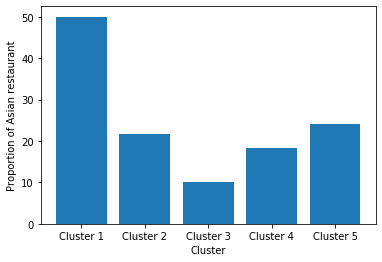

In [158]:
plt.bar(x = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'] ,height =proportion)
plt.ylabel('Proportion of Asian restaurant')
plt.xlabel('Cluster')
plt.show()

In the cluster 1, we have a large proportion of Asian restaurants. The Cluster 3 and 4 have a small proportion of Asian restaurant. So it's important for us to keep in mind because the competition in Paris is very hard.

### Observations of features

#### Municipal Population

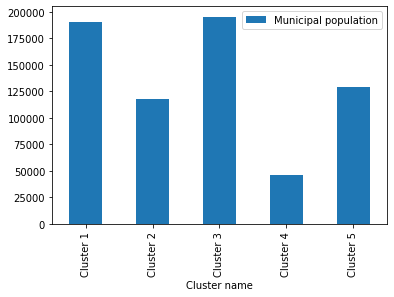

In [171]:
mean_cluster.plot.bar(x= 'Cluster name', y = 'Municipal population')

The population in cluster 1 and 3 are very important, but in the cluster 4, the population is very low. 
It's important for a restaurant to have a large of people around his place.

#### Young people

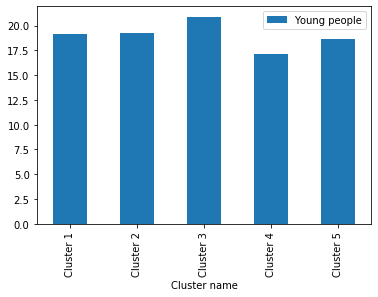

In [172]:
mean_cluster.plot.bar(x= 'Cluster name', y = 'Young people' )

The proportion of young people is very similar. So it's not important for our study

#### Old people

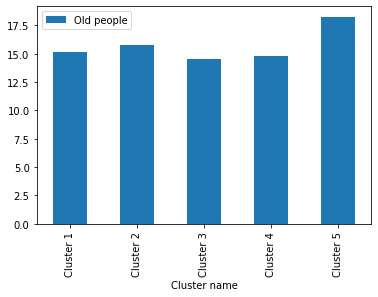

In [173]:
mean_cluster.plot.bar(x= 'Cluster name', y = 'Old people')

The proportion of old people is very similar. So it's not important for our study

#### Student

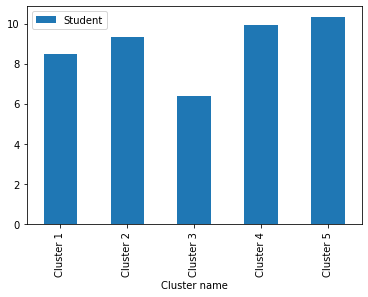

In [178]:
mean_cluster.plot.bar(x= 'Cluster name', y = 'Student')

The proportion of student is low in the cluster 3 and it's constant in the other (e.g 10 % of the population).
It's important to keep in mind because we can offer student discount to attract this population

#### Median income

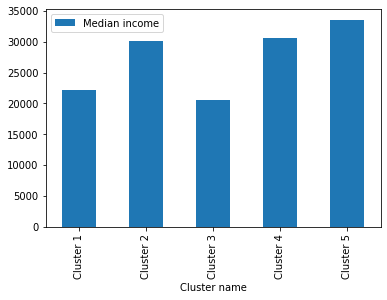

In [179]:
mean_cluster.plot.bar(x= 'Cluster name', y = 'Median income')

The median income is low for cluster 1 and 3 and very high for the other cluster. We keep in mind because the price of food is directly correlated with the median income of the population.

#### Employment density

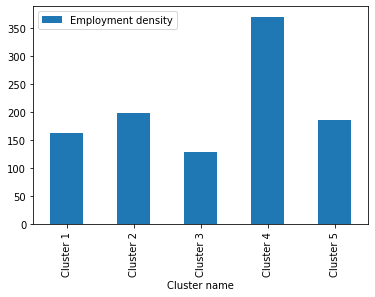

In [180]:
mean_cluster.plot.bar(x= 'Cluster name', y = 'Employment density')

The cluster 4 has a high employment density. Is due to a lot of Firm in the cluster. But in cluster 3, the density is very low. It's important for our study because a lot of workers lunch around their office.

#### Sale price

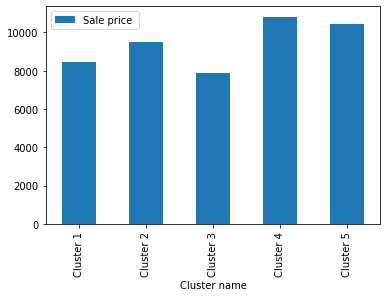

In [177]:
mean_cluster.plot.bar(x= 'Cluster name', y = 'Sale price ')

The Sale price of rental is very high in cluster 4 and 5. Is due to the attractivity of the different neighborhood, because they have a lot of monuments. In cluster 3 and 1, the rental is low.

# Result and Discussion <a name="results"></a>

By analyzing the different clusters more precisely, we realize that there are disparities. First of all, some districts by their history, have monuments, restaurants, activities, which attract different populations and therefore create a disparity in Paris. We also observed a higher proportion of Asian restaurants in certain cluster (eg cluster 1). Cluster 3 has the lowest proportion of Asian restaurants.

Some clusters are more populated than others, due to the fact that some districts are more residential, and others are business districts. The proportion of old people and young people is equivalent in all the clusters so this should not guide our decision.

The number of students remains fairly high in each cluster, which can push us to offer special offers for students and thus make our business more attractive. The median income in the cluster is quite high because we are in Paris, but we can observe that in cluster 3 and 1, the income is lower. This can influence the price of food, knowing that the higher the income, the more we will be able to offer better quality products and therefore more expensive.

The density of employment can also play a role in our restaurant positioning. People working around the restaurant will tend to eat in the same neighborhood. This can be an important economic argument. We observe that cluster 4 has a high density of employment. Conversely, cluster 3 has a lower density.

Finally, the rental price influences our decision. A high price will generate high costs. However, we observe that cluster 3 has the cheapest rent compared to the others. It's important to take it into the equation

Concerning the clustering model, we used a simple k-means model, we used the elbow method to minimize inertia. This method is simple to implement but it is not effective in all cases. We could start over with another clustering algorithm and see if we get the same results.

# Conclusion <a name="conclusion"></a>

Our goal was to choose the best location for our Japanese restaurant. We recovered the paris data with the different districts, then we added data on the characteristics of the populations in these Boroughs in order to be able to cluster them more easily. Finally we created these clusters and we analyzed them separately. What emerges from this analysis is that we must position ourselves on the type of restaurants that we want to open. For example, if we want to reach people with low budgets, families with their children, and with low competition and cheap rent, we will choose the neighborhoods of cluster 3. On the other hand, if we want to create a gourmet Japanese restaurant , and touch the executives who work in the offices and who earn a very good living, we will rather choose the neighborhoods of cluster 4. Finally, several choices are possible depending on the type of restaurant we want to open